In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**EXPLORATORY DATA ANALYSIS**

In [2]:
personality = pd.read_csv('personality.csv')
personality.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
personality.shape

(8675, 2)

In [4]:
personality.isnull().sum()

type     0
posts    0
dtype: int64

In [5]:
personality_post=personality.groupby('type').agg({'posts':'count'})
personality_post.transpose()

type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
posts,190,675,231,685,42,48,39,89,1470,1832,1091,1304,166,271,205,337


<Figure size 1440x720 with 0 Axes>

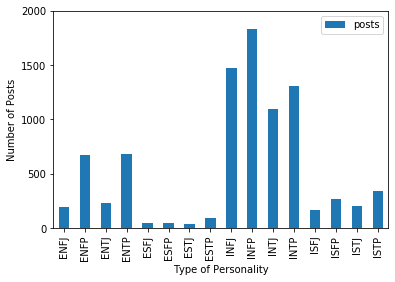

In [6]:
# Number of post by each type
plt.figure(figsize=(20,10))
personality_post.plot(kind='bar')
plt.xlabel('Type of Personality')
plt.ylabel('Number of Posts')
plt.legend()
plt.yticks([0,500,1000,1500,2000])
plt.show()

In [7]:
# How many words per post?
personality['word_per_post'] = personality['posts'].apply(lambda x: len(x.split()))

In [8]:
personality_word = personality.groupby('type')['word_per_post'].sum()
personality_word_sort=personality_word.sort_values(ascending=False)
personality_word_sort

type
INFP    2280021
INFJ    1879295
INTP    1561883
INTJ    1303284
ENFP     851020
ENTP     826107
ISTP     392795
ISFP     307960
ENTJ     281378
ISTJ     248711
ENFJ     244451
ISFJ     206055
ESTP     103471
ESFJ      54200
ESFP      49062
ESTJ      47952
Name: word_per_post, dtype: int64

Text(0, 0.5, 'Number of word per post in each type')

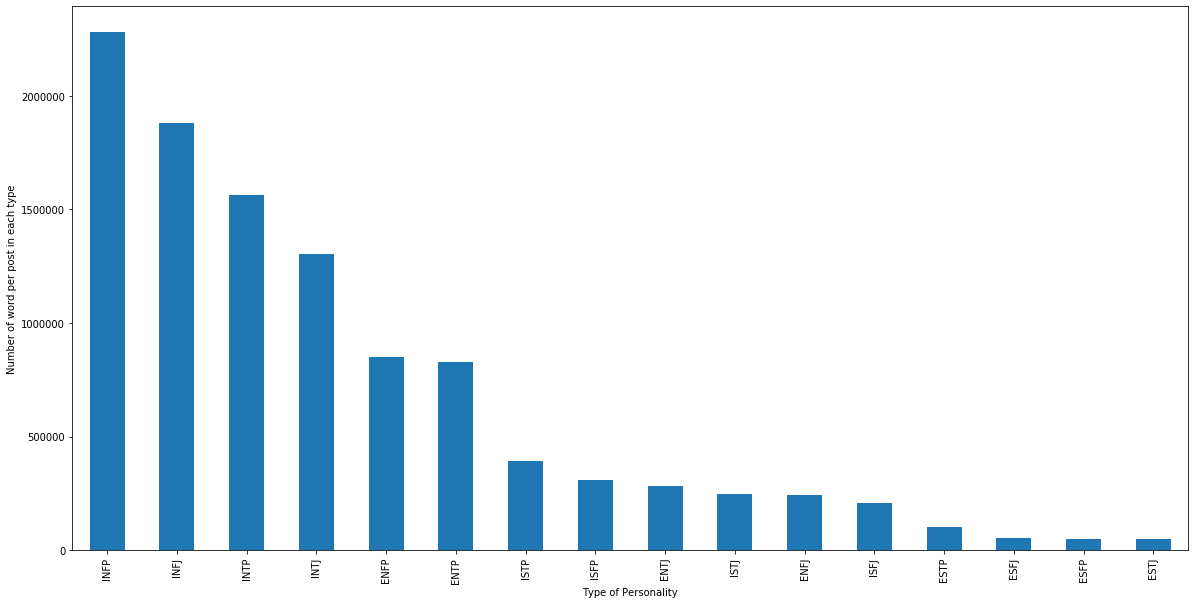

In [9]:
# Number of word per post by each type
plt.figure(figsize=(20,10))

personality_word_sort.plot(kind='bar')
plt.xlabel('Type of Personality')
plt.ylabel('Number of word per post in each type')

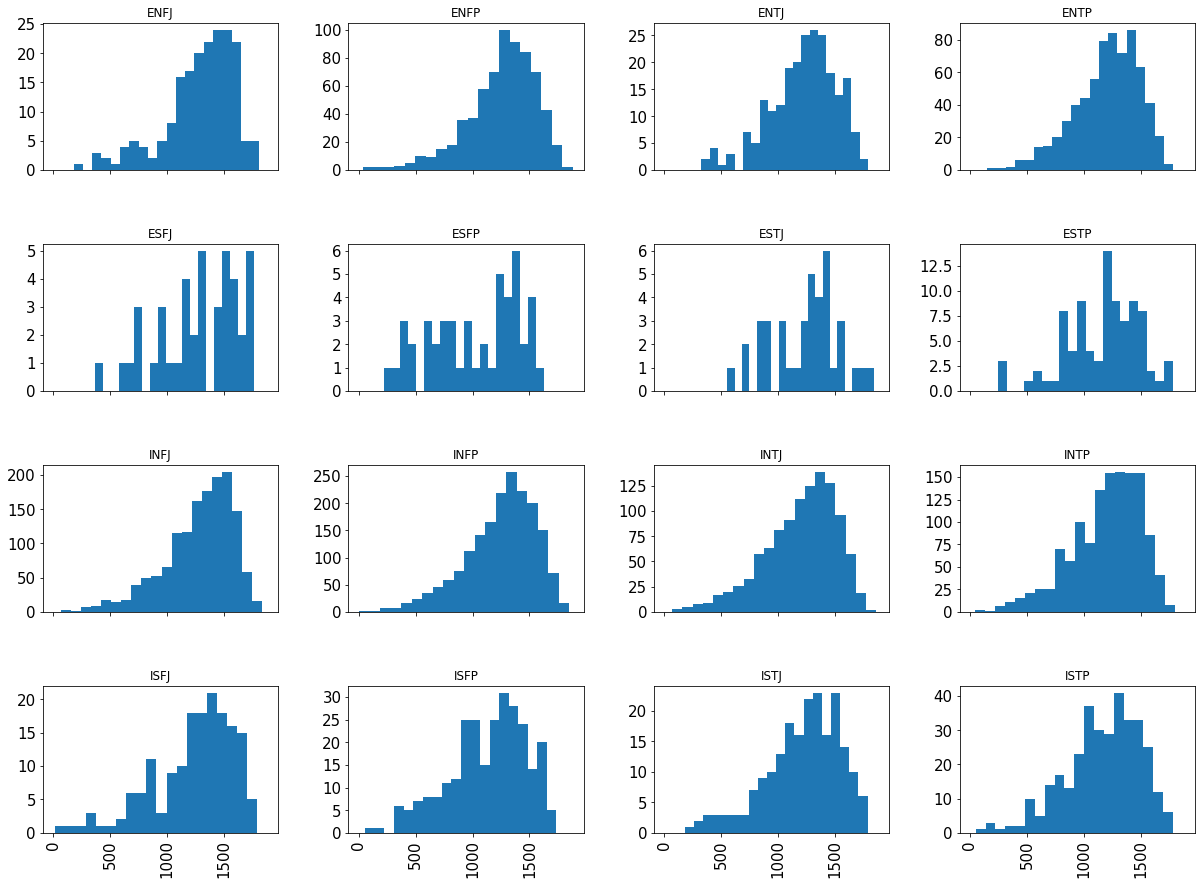

In [10]:
# Word Distribution by type
personality.hist(column='word_per_post',by='type',grid=False,bins=20,
                xlabelsize=15, ylabelsize=15,figsize = (20,15), sharex=True)
plt.show()

**Text Analysis**

In [11]:
mapping={'I':'Introversion',
         'E':'Extroversion',
         'N':'Intuition',
         'S':'Sensing',
         'T':'Thinking',
         'F':'Feeling',
         'J':'Judging',
         'P':'Perceiving'}

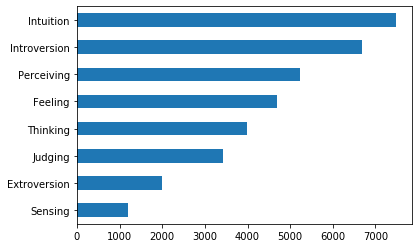

In [12]:
# How many words for each single type of personality
X = pd.DataFrame()
for i in 'INTJESFP':
    X[i] = personality['type'].apply(lambda x: 1 if i in x else 0)

_ = X.sum().sort_values().rename(lambda x: mapping[x]).plot(kind='barh')

In [13]:
import nltk
from nltk.corpus import stopwords
from  nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [14]:
personality['saperate_posts'] = personality['posts']

In [15]:
def identify_tokens(row):
    saperate_posts = row['saperate_posts']
    tokens = nltk.word_tokenize(saperate_posts)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [20]:
from nltk.corpus import stopwords
from collections import defaultdict

In [21]:
def create_corpus(personality):
    corpus=[]
    for text in personality.posts.str.split():
        for i in text:
            corpus.append(i)
    return corpus

In [22]:
stop = set(stopwords.words('english'))
print(stop)

{'its', 'such', 'down', "you'll", 'more', "wouldn't", 'until', 'then', 're', 'once', 'because', 'during', 'off', 'themselves', 'as', 'of', 'there', "you'd", 'herself', 'having', 'doing', 'wasn', 'were', 'hers', "it's", 'ma', "needn't", "weren't", 'weren', 'where', 'her', "shouldn't", 'won', 'do', 'now', 'in', 'before', 'or', 'each', "mightn't", 'does', 'his', 'all', 'being', 'from', "doesn't", 'most', 'don', "mustn't", 'she', 'just', 'o', 'the', 'no', 'which', 'further', 'had', 'me', 'doesn', "hadn't", 'them', 'out', 'while', "don't", 'has', "should've", 'to', 'when', 'than', "haven't", 'we', 'you', 'yourself', "aren't", 'have', 'didn', 'under', 'couldn', 'here', 'haven', 'shan', 'my', 'your', 'm', 'itself', 'this', 'after', 'other', 'any', 'so', 'it', 'can', "couldn't", 'am', 'him', 'into', 'y', 'those', 'should', 'their', 'i', 'ain', 'are', 'hasn', "hasn't", 't', 'they', 'but', "didn't", "shan't", 'is', 'again', 'about', 'for', 'ourselves', 'too', 'only', 'been', 'these', 'through', 

In [23]:
# Top 15 words in posts
corpus=create_corpus(personality)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] +=1
    else:
        dic[word] = 1

top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:15]

Text(0.5, 1.0, 'Frequency of top 15 words in posts')

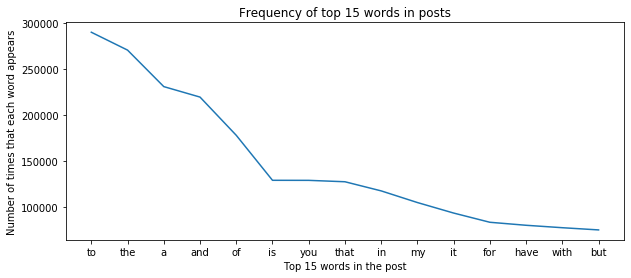

In [29]:
plt.figure(figsize=(10,4))
x, y = zip(*top)
plt.plot(list(x), list(y))
plt.ylabel('Number of times that each word appears')
plt.xlabel('Top 15 words in the post')
plt.title('Frequency of top 15 words in posts')

In [39]:
def category_top15(personality,category):
    personality_15 = personality[personality.type == category]
    corpus = create_corpus(personality_15)
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1
        else:
            dic[word] = 1

    top_15 = sorted(dic.items() , key = lambda x:x[1] , reverse = True)[:15]

    plt.figure(figsize = (15,5))
    x , y = zip(*top_15)
    sns.barplot(list(x) , list(y))
    plt.title('Frequency of Top 15 words in this '+ category)
    plt.show

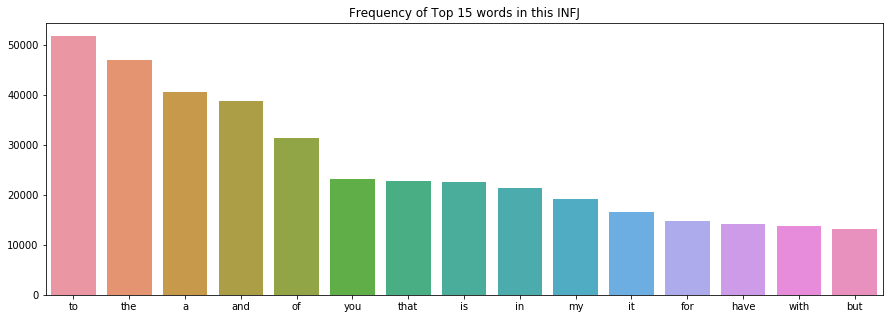

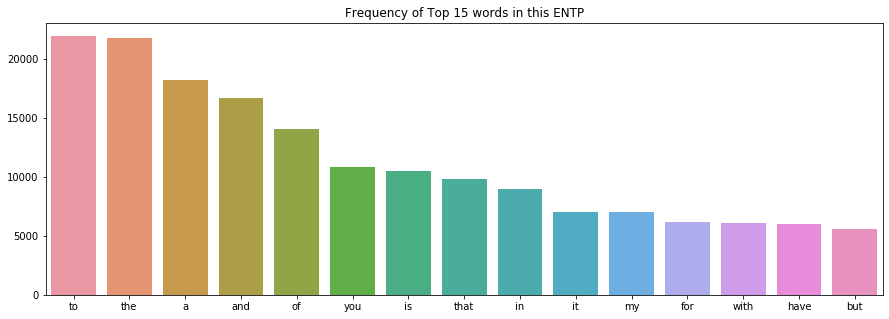

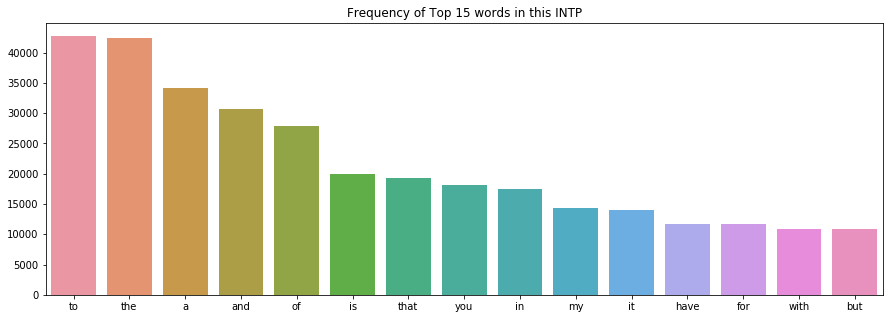

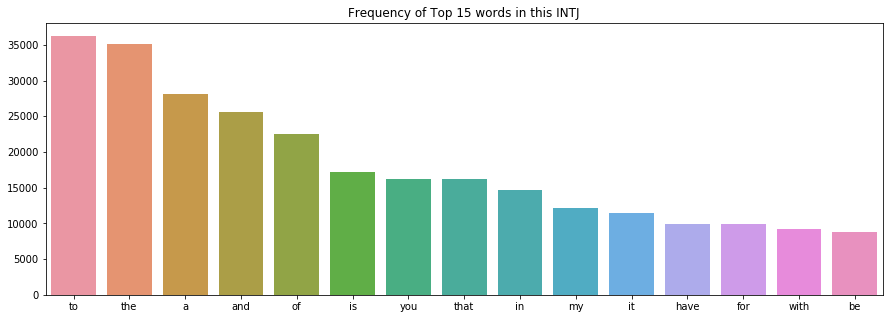

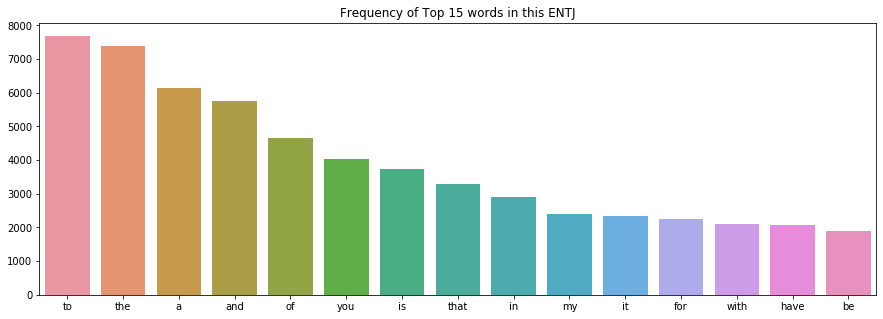

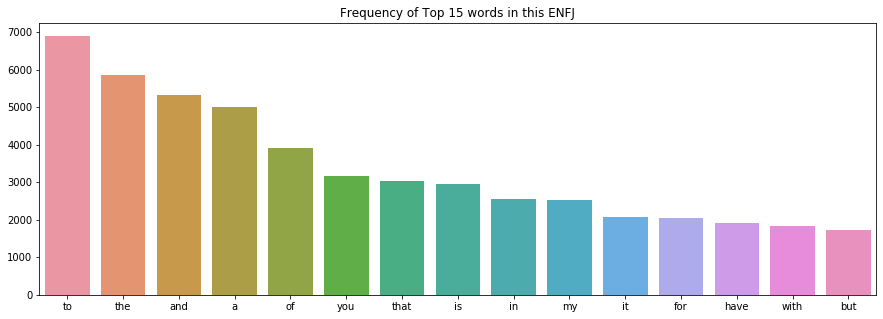

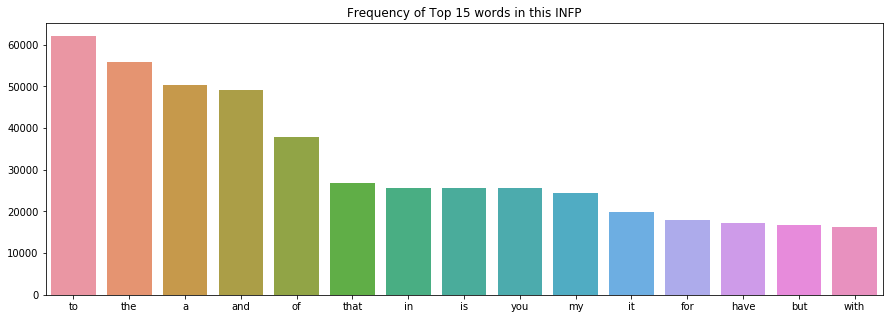

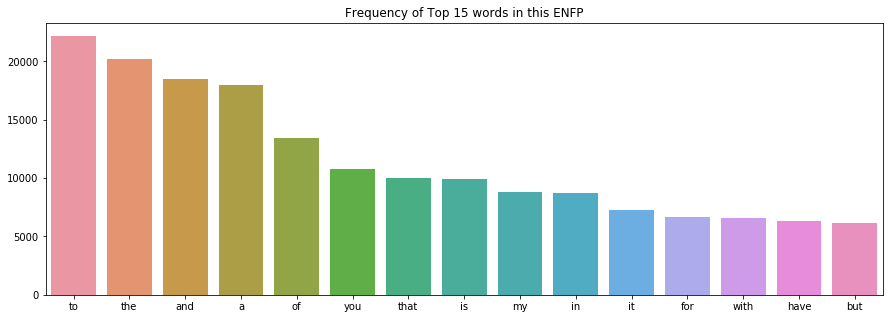

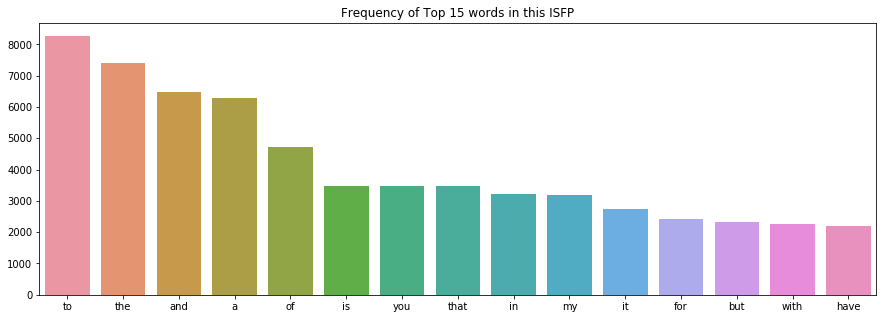

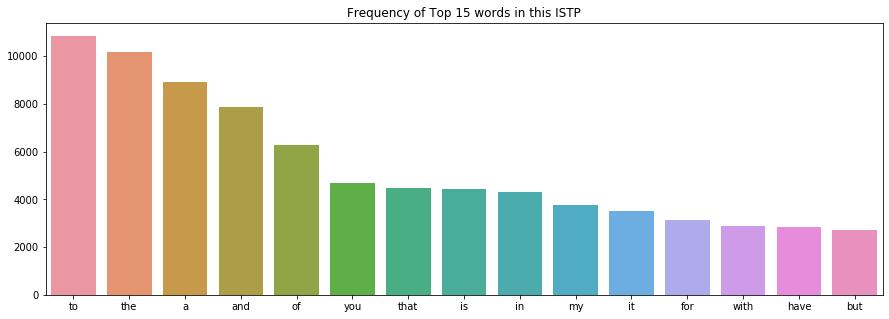

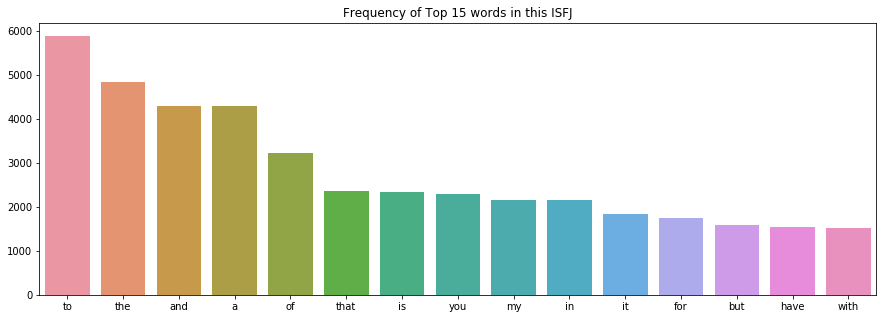

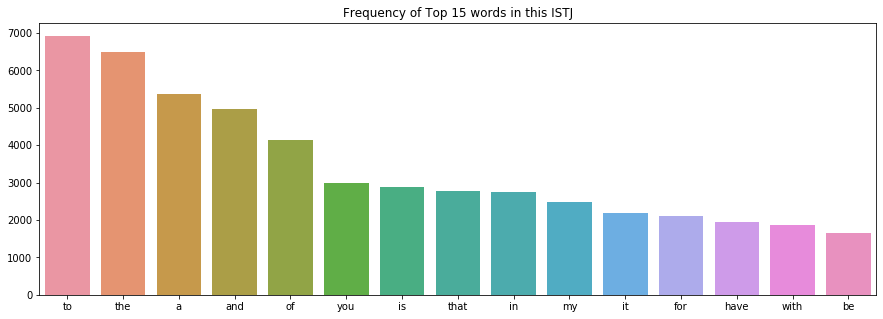

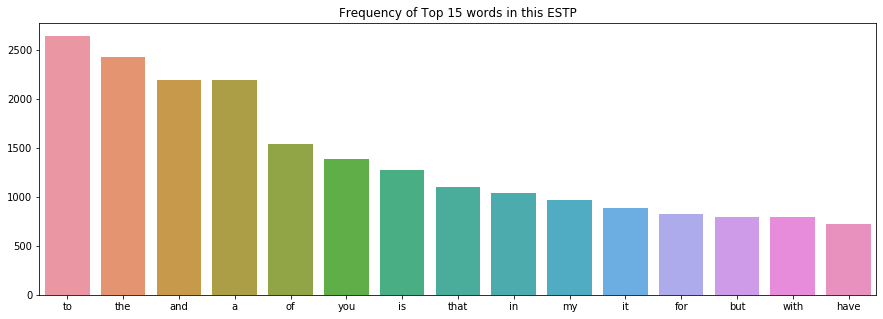

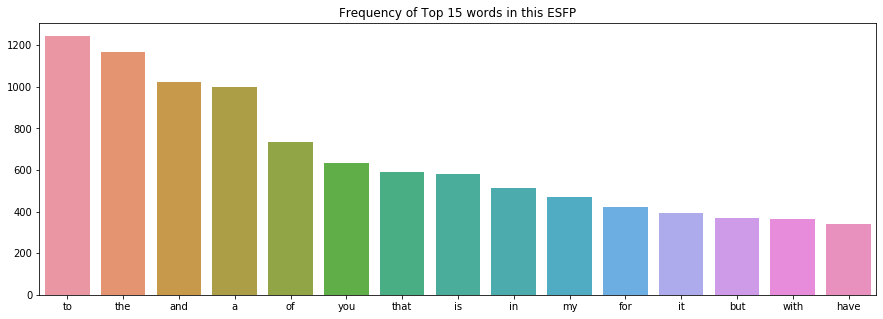

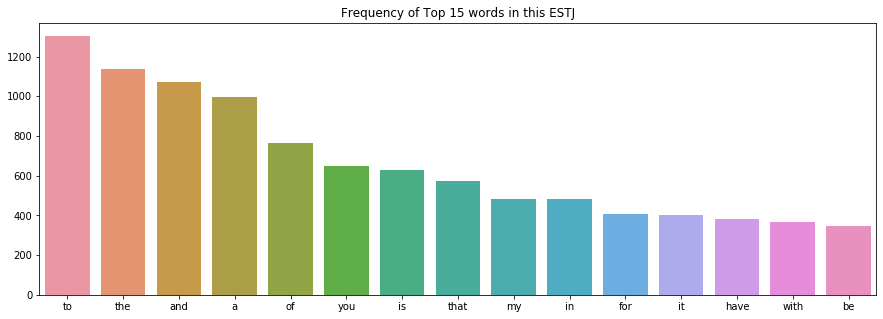

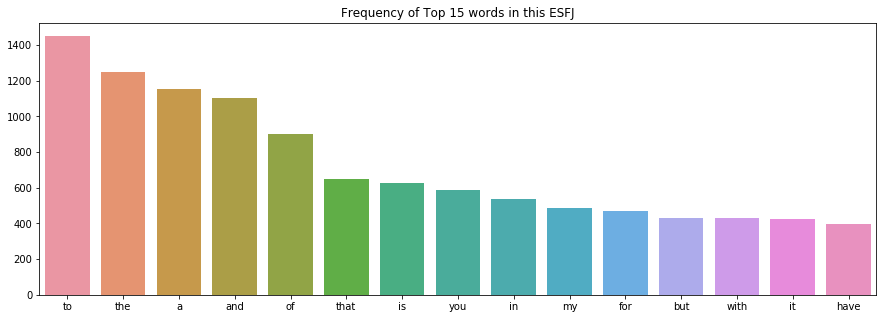

In [40]:
categories = personality.type.unique()
for i in categories:
    category_top15(personality,i)

**Building Machine Learning Algorithm**

In [41]:
from sklearn.model_selection import train_test_split

In [74]:
cv=CountVectorizer()
XX1=cv.fit_transform(personality['posts'])
YY=personality['type']
tfidf_transformer = TfidfTransformer()
XX1_tfidf=tfidf_transformer.fit_transform(XX1)
XX1_tfidf

<8675x145412 sparse matrix of type '<class 'numpy.float64'>'
	with 4516646 stored elements in Compressed Sparse Row format>

In [76]:
XX1_train,XX1_test,Y_train,Y_test=train_test_split(XX1_tfidf,YY,test_size=0.2,random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

In [78]:
# SGDC Classifier on train dataset
SGDC=SGDClassifier()
model_SGDC=SGDC.fit(XX1_train,Y_train)
Y_pred=model_SGDC.predict(XX1_test)
SGDC_score=round(model_SGDC.score(XX1_train,Y_train)*100,2)
print('The accuracy score of SGDC model:', SGDC_score,'%')

The accuracy score of SGDC model: 95.66 %


In [79]:
# SGDC Classifier on test dataset
SGDC_score=round(model_SGDC.score(XX1_test,Y_test)*100,2)
print('The accuracy score of SGDC model:', SGDC_score,'%')

The accuracy score of SGDC model: 68.01 %


In [80]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

        ENFJ       0.60      0.15      0.24        41
        ENFP       0.67      0.64      0.65       125
        ENTJ       0.70      0.48      0.57        44
        ENTP       0.64      0.59      0.61       135
        ESFJ       1.00      0.14      0.25         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       1.00      0.14      0.25         7
        ESTP       0.83      0.33      0.48        15
        INFJ       0.68      0.71      0.69       288
        INFP       0.68      0.84      0.75       370
        INTJ       0.65      0.69      0.67       193
        INTP       0.70      0.81      0.75       293
        ISFJ       0.88      0.51      0.65        45
        ISFP       0.66      0.40      0.49        53
        ISTJ       0.79      0.43      0.56        44
        ISTP       0.66      0.61      0.64        67

    accuracy                           0.68      1735
   macro avg       0.70   

In [81]:
lr=LogisticRegression()
model_lr=lr.fit(XX1_train,Y_train)
Y_pred=model_lr.predict(XX1_test)
lr_score=round(model_lr.score(XX1_train,Y_train)*100,2)
print('The accuracy score of SGDC model:', lr_score,'%')

C:\Users\namdo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy score of SGDC model: 74.74 %


In [82]:
# Logistic Regression on test dataset
lr_score=round(model_lr.score(XX1_test,Y_test)*100,2)
print('The accuracy score of lr model:', lr_score,'%')

The accuracy score of lr model: 60.23 %


In [83]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

        ENFJ       0.33      0.02      0.05        41
        ENFP       0.74      0.53      0.62       125
        ENTJ       0.78      0.16      0.26        44
        ENTP       0.71      0.50      0.59       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.60      0.66      0.62       288
        INFP       0.53      0.88      0.66       370
        INTJ       0.60      0.69      0.64       193
        INTP       0.66      0.78      0.72       293
        ISFJ       1.00      0.11      0.20        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.75      0.07      0.12        44
        ISTP       0.78      0.27      0.40        67

    accuracy                           0.60      1735
   macro avg       0.47   

C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# Random Forest Classifier on train dataset
rfc=RandomForestClassifier()
model_rfc=rfc.fit(XX1_train,Y_train)
Y_pred=model_rfc.predict(XX1_test)
rfc_score=round(model_rfc.score(XX1_train,Y_train)*100,2)
print('The accuracy score of rfc model:', rfc_score,'%')

The accuracy score of rfc model: 100.0 %


In [85]:
# Random Forest Classifier on test dataset
rfc_score=round(model_rfc.score(XX1_test,Y_test)*100,2)
print('The accuracy score of rfc model:', rfc_score,'%')

The accuracy score of rfc model: 35.68 %


In [86]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.75      0.07      0.13       125
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.67      0.06      0.11       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.33      0.43      0.37       288
        INFP       0.31      0.85      0.46       370
        INTJ       0.40      0.19      0.25       193
        INTP       0.52      0.44      0.48       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.36      1735
   macro avg       0.19   

C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# KNearestNeighbor on train dataset
knn=KNeighborsClassifier()
model_knn=knn.fit(XX1_train,Y_train)
Y_pred=model_knn.predict(XX1_test)
knn_score=round(model_knn.score(XX1_train,Y_train)*100,2)
print('The accuracy score of knn model:', knn_score,'%')

The accuracy score of knn model: 46.57 %


In [88]:
# KNearestNeighbor on test dataset
knn_score=round(model_knn.score(XX1_test,Y_test)*100,2)
print('The accuracy score of knn model:', knn_score,'%')

The accuracy score of knn model: 25.48 %


In [89]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

        ENFJ       0.11      0.24      0.15        41
        ENFP       0.18      0.41      0.25       125
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.29      0.05      0.09       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.50      0.07      0.12        15
        INFJ       0.27      0.48      0.34       288
        INFP       0.28      0.52      0.37       370
        INTJ       0.17      0.03      0.04       193
        INTP       0.43      0.07      0.12       293
        ISFJ       0.41      0.20      0.27        45
        ISFP       0.33      0.06      0.10        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.27      0.09      0.13        67

    accuracy                           0.25      1735
   macro avg       0.20   

C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# MultinomialNB Classifier on train dataset
mnb=MultinomialNB()
model_mnb=mnb.fit(XX1_train,Y_train)
Y_pred=model_mnb.predict(XX1_test)
mnb_score=round(model_mnb.score(XX1_train,Y_train)*100,2)
print('The accuracy score of mnb model:', mnb_score,'%')

The accuracy score of mnb model: 21.1 %


In [91]:
# MultinomialNB Classifier on test dataset
mnb_score=round(model_mnb.score(XX1_test,Y_test)*100,2)
print('The accuracy score of mnb model:', mnb_score,'%')

The accuracy score of mnb model: 21.33 %


In [92]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.00      0.00      0.00       125
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.00      0.00      0.00       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.00      0.00      0.00       288
        INFP       0.21      1.00      0.35       370
        INTJ       0.00      0.00      0.00       193
        INTP       0.00      0.00      0.00       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.21      1735
   macro avg       0.01   

C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# Compare Algorithm's Performance
score={'Train':[95.66,74.74,100,46.57,21.1],
       'Test':[68.01,60.23,35.68,25.48,21.33]}

score_frame=pd.DataFrame.from_dict(score,orient='index',columns=['SGDC','Logistic Regression','Random Forest',
                                                                 'KNearestNeighbor','MultinomialNB'])
score_frame

,SGDC,Logistic Regression,Random Forest,KNearestNeighbor,MultinomialNB
Train,95.66,74.74,100.00,46.57,21.10
Test,68.01,60.23,35.68,25.48,21.33


In [102]:
# Apply SGDC algorithm on small sample
cv_new=CountVectorizer(max_features=1056)
X_new=cv_new.fit_transform(personality['posts'])
X_new_tfidf=tfidf_transformer.fit_transform(X_new)
X_new_tfidf

<8675x1056 sparse matrix of type '<class 'numpy.float64'>'
	with 2765553 stored elements in Compressed Sparse Row format>

In [103]:
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X_new_tfidf,YY,test_size=0.2,random_state=42)

In [104]:
SGDC=SGDClassifier()
model_SGDC=SGDC.fit(X_new_train,Y_new_train)
Y_new_pred=model_SGDC.predict(X_new_test)

In [105]:
# Predict pertionality type by using SGDC Classifier
post = ['America is well known for being a country of freedom because people have freedom to speak, to give opinion, to follow their dreams, and to do what they would like to do. Therefore, a lot of people try to live in the USA because this is a country where people have freedom to talk and to be creative without judgement. In the corporate world, people are encouraged to get freedom to be creative and innovative to get the work done. However, freedom is different from privacy because the company grants the freedom to workers for creativity and innovation to finish their jobs, but they will lose their privacy to do their own things. At work, the employers always monitor their employees, for the company would like to make sure that they pay their employees for doing only the jobs and helping the company solve the problems. Therefore, they have to monitor their employees when they are at work. On one hand, they think that employees are really productive and effective under the monitoring. On the other hand, employees feel pressure under the supervision because they lose their own privacy, and they may think that the company does not trust them. Because of this incident, people will likely raise this question:Is it ethical for the company to monitor its employees at work? After running the research, the act of monitoring workers is legal and beneficial to the employers, but not ethical to the employees.To begin with, the company believes that it is really beneficial and important to monitor their workforce. After reading the article Legal and Ethical Issues of Employee Monitoring, the author states: If a business owner does nothing to stop these counter-productive activities, then it is not likely the owner could stay in business. Workplace monitoring can be beneficial for an organization to obtain productivity and efficiency from its employees. The enormity of potential productivity loss, as reported by Court (2004), is approximately one million dollars annually for a company with 500 employees surfing the internet for just a half hour a day. Using these facts, if an employee spends two hours per day on the Internet, and the organization has 500 unmonitored employees, the potential loss could be nearly $4 million (Jonathan, 2013). The statement would like to give the readers specific reasons for monitoring the employee. For example, the employers would likely lose millions of dollars because the employees were not focusing on working. By monitoring employees, the company can boost the production rate and the employees’ efficiency. When a company hires employees, the company always prefers employees who possess high qualifications and responsibilities for getting the job done. Put it another way, the company pays its employees to do the job, not to relax and not to use companys properties, including laptop, internet, and work phone to serve their personal interests because the company tries to take advantage of the workforce’s intelligence to run the business and to generate profit. Specifically, the company would like its workforce to commit eight hours per day and put the effort to get the work done. Therefore, with the development of technology, the act of monitoring employees is really necessary and accessible from the companys perspective because the executive levels want to make sure that its employees are using the companys properties to do the work and to generate profit when they are at work. From the companys standpoint, it is quite useful to watch its employees.The company always has good and bad employees, so watching them can help the company catch the dishonest people. After reading the article The Advantages of Monitoring Employees, the writer says, There will always be dishonest employees-especially if you have a large organization that has many employees. In this instance, you want to be able to catch these employees who often falsely believe that they are above the rules. You want to catch them in the act of breaking company policies in the absence of management. By monitoring them, you might be able to catch the guilty employees and immediately enforce disciplinary measures (Nicky, 2019). The dishonest employees will be the main reasons why lots of companies go bankrupt because they can steal lots of money from the company and sell sensitive information to the competitors. Among many employees, it is hard to tell which one is good and which one is bad. From the companys standpoint, monitoring employees through email, text, work phone, and work laptop will be the main methods to prevent the worst events caused by dishonest employees.Also, it is legal to monitor employees at work. The author states, Another legal issue arising from employee monitoring is an organization’s legal obligation to do so. Court (2004) discusses a recent survey reporting that 68% of employers who monitor employees’ computer activities cite legal liability as their main motivation. Although Court writes, no court of law has ever ruled that an employer is required to monitor employees’ electronic communications; some have suggested that such monitoring would be wise. The courts can hold companies liable if they do not seek to prevent other employees from creating a hostile work environment. Employers may face liability for not only what someone communicates over the Internet, but also for what someone sees on workplace computer displays. For example, several Minneapolis Public Library staffers filed a complaint in 2001 with the U.S. Equal Employment Opportunity Commission stating that the library subjected them to a sexually hostile work environment after exposing them to hard-core pornography left on computer displays by library patrons American libraries (2003) (Johnathan, 2013). Based on the statement, it is not mandatory, but the company is required to have some forms of protection, such as monitoring, to its employees at work. If the company is not monitoring its employees’ activities, the workers can create unhealthy environment at work. As a result, the victim can sue the company for not having methods of protection to its employees. In that case, the company will be liable for the accident. For example, if the company does not monitor and watch its employees at work, they can feel free to watch inappropriate videos, such as pornography at work. If another employee files the complaint to the U.S. Equal Employment Opportunity Commission, the company will be liable for not reporting the inappropriate activities at work. Thus, monitoring employees not only assists the company to boost the employee’s efficiency, but also prevents the company from being liable for any type of inappropriate activities at work.Even though the act of monitoring employees can bring lots of benefits, including increase in production rate and employee’s efficiency, a large number of employees seem to oppose this action because it is not ethical from their point of view. The main important thing is that employees claim that their privacy has been invaded. According to the article Legal and ethical issues of employee monitoring, Johnathan says, Watson (2001) continues to say labor unions and other advocacy groups have complained exceedingly about electronic monitoring-charging that it invades employees privacy, causes work-related stress, and low morale, and employers can use it unfairly. It is possible that employees will feel like their employers are treating them unfairly - resulting in the employees taking less initiative, and perhaps do only the bare minimum just to keep their job. Therefore, from an employee stance, workplace monitoring could be detrimental to productivity and efficiency (Johnathan, 2013) Employees have already had lots of stress at work because they have lots of projects on going, many contracts that they need to read, and many different assignments that they need to meet the deadlines. Even though the employees do everything to serve the organization and their bosses interests, their managers seem to lack of trust in their employees because they watch every action. This will lead the employees to think that the organization does not respect their privacy, does not have faith in the employees, and does not treat them equally. Put it another way, the employees do not have flexibility and privacy to think of new ideas or solutions for problems because they do not feel comfortable being watched. Then, lots of people will raise a question: Why are you watching me even though I am an excellent employee? Consequently, this will lead to bad results. For example, employees do not have motivation to work on the organization’s interest because they deserve the respect from the company, but they get the disrespect in return. Also, the employees do not have flexibility and are always under stress to think of solutions, so they will not be able to get the work done efficiently. Therefore, watching employees can actually reduce the production rate and efficiency from the employees point of view.Another ethical debate is that the employees do not have the right to privacy at work. According to the article Legal and ethical issues of employee monitoring, the writer says, Woodbury continues that from the employee’s point of view, business might act unethically while monitoring keystrokes, looking at private email, or providing inadequate equipment that leads to vision, neck, hand, wrist, or arm damage. The keystroke monitoring is particularly invasive, because any time an employee rests, perhaps stretching for health or having a short chat for sanitys sake, the person is off task (Woodbury,2003). Such strict monitoring can create rulings or workplace decisions that could discipline the employee for simply taking a legitimate break. The monitoring program cannot know when an employee has an upset stomach and needs to be away from their desk - it just senses that the employee is not currently working. The employers get, in a sense, biased and incomplete data” (Johnathan, 2013). The employees do not feel comfortable at work when they have to pay attention to get the work done. Even though they come to office to work, they still need a short break from work to release stress. We are human beings, so it is really difficult to sit at one place and do the project from 8 am to 6 pm without breaks. Also, working at a corporate level is really unhealthy if you only sit entirely at your desk for 8 hours. Therefore, you have to spend a short amount of time walking and stretching your body to stay healthy. However, the monitoring device is not smart enough to see when a person is being lazy from work and when you are really stretching your body. In other words, it only alerts the employers when the employees are not working. By doing so, the employees are even afraid of taking a short break because they may be alerted for not working. If employees do not take a break from work, and they always feel stressed, they will not be able to focus on work and to feel comfortable and flexible to come up with good solutions for problems. At that point, the company will hurt itself for losing the employees efficiency and production rate. Therefore, it seems not to be fair to judge employees working behaviors by only looking at data retrieved from the monitoring devices.Moreover, the act of observing the employees personal information is not acceptable by monitoring them at work because it can create an unfair work environment. Based on the article What are the Ethical Implications of Observing Employees Without Their Knowledge? written by Johnathan Lister, the author states, Monitoring company electronic and digital devices, including phones and computers, is legal in all states. However, monitoring these devices without employee knowledge can create an ethical dilemma for you as a business owner because of the personal information you may hear or see. For example, seeing an email an employee sends using your company’s computer may reveal the employee is in credit trouble and at risk for losing her house in foreclosure. This information may cause you to treat the employee differently even though the employee does not want you to know this information (Johnathan, 2020). The employers will be able to see the employees’ personal information by monitoring the employees daily. However, there will be a lot of personal information and conversations that the employees do not want to share. In fact, the employers would be bias with the employees after knowing their secrets; thus it will be not fair to the employees if this happens. For example, an employee is really hard working and always creates excellent solutions for any problems at work, but she has been in debt and been working hard to pay off her debt. One day, the employer figures out this matter. Some nice bosses will offer her a little bonus, but the others will have negative thoughts about her. Specifically, a lot of negative bosses will use this excuse to fire her because they believe that one day she will likely steal money from the company to pay off her debt even though she is a good worker. Thus, the supervisor will likely treat their employees unequally after knowing the employees confidential information.In order to solve the conflict between the employers and the employees about the monitoring, a clear monitoring policy should be provided. Based on the article Legal and ethical issues of employees monitoring, Johnathan states, Employers must be mindful that many employees mistakenly think personal computer use at work is private. A computer usage policy needs a clear statement that employees should not expect privacy with anything they put on the company computer network (Johnathan, 2013). When the employees come to the office to work, everything that workers use at the office belongs to the employers. For example, the desktop, laptop, and phone are the company’s assets. Therefore, the information stored in the desktop also belongs to the employers. Because of this reason, the employees should not store personal information at work because the information stored at the companys properties also belongs to the company. Hence, if the employees do not want to leak their private information, they should not use the companys property to exchange or communicate their personal information. Because the employers have the right to monitor their employees, they have the right to see information stored at the office. The author also states, A computer usage policy needs to be clear so that an employee knows that the computer is property of the employer. If an organization is going to monitor its employees, then the company should give every employee a document explaining the policy to read and sign. It would also be prudent for the employer to create a training session to describe exactly what the policy does and does not allow. A training session would allow employees to ask questions about what is acceptable computer use, instead of having them disciplined for a violation (Johnathan, 2013). The employer should be clear and transparent about what can and cannot do with the companys properties, including laptop and desktop computers. Also, the company must notify people that they will be part of the monitoring program at work. Thus, a document should be provided to let employees know which information and activities will be monitored. By doing so, everyone can feel comfortable because they know what they are doing is not violating the company policy. Besides, the company shows them respect for not secretly watching them. Even though the employees do not like this fact, they still feel respected because the company is transparent about the monitoring program.In conclusion, it is really important to keep a safe and healthy environment at work to have employees feel safe and to help the employers stay away from liability. The most popular way that the employers have been using is to monitor the employees, but it will create negative feeling from the workforce. Thus, the employers should be clear with their employees about what information and activities that they monitor. In fact, they should educate the employees about what they can and cannot do within the company scope and punish the employees and the supervisors who violate the monitoring policy. For example, the employers should get punishment if they eavesdrop the employees’ personal information which is not in the list of the monitoring policy. Also, the employees will get punishments for violating the monitoring policy. Even though it seems unethical to monitor the employees, the employers still can implement this method to watch their behaviors and activities if they can be reasonable and do the right way.I really like Data Science because I can data analytic and Machine Learning to solve financial problem. The reason that I come back to do my graduate degree in Data Science is to back up my accounting and finance background. My career will be Quantitative Financial Analyst wheere I can apply data analytic and data visualization by using Python, R, Tableau, and SQL to build predictive and financial modeling.Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out there to help you to get started. I’ve recently started to learn, play, and work on Data Science & Machine Learning on Kaggle.com. In this brief post, I’d like to share my experience with the Kaggle Python Docker image, which simplifies the Data Scientist’s life.The Department of Defense (DOD), the Department of Homeland Security, and the Department of State (DS) are all U.S. government agencies, so their mission is to defend for the U.S. interests in the cyber zone by mainly protecting the network. According to the article “DOD teams with DHS for critical infrastructure protection” written by Lauren C. Williams, DOD and DHS decide to work together to have the critical infrastructure protected by sharing information with the private sector and to stop the supply chain problems.After reading the article “The Department of Defense Cyber Strategy”, the Department of Defense (DOD) has some distinct responsibilities. Because the main purpose of DOD is to use military to declare attacks and to defend wars to protect overall the U.S. interest, the missions will be applied the same to the cyber zone. To begin with, DOD must form a team of cyber experts to identify and to prevent the cyberattacks immediately when they happen in stead of using the military. In other word, a team of cyber experts will present the U.S. military to defend any forms of attacks in the cyber zone. Secondly, DOD will strengthen its cyber teams by training them on defending mainly network, preventing cyberattacks, and minimizing their consequences to protect the U.S. interest, and supporting military, and prospective decisions. Overall, DOD will mainly focus on protecting network to prevent hackers from deploying the vulnerabilities.As compared to DOD and DHS, DS seems to have lighter responsibilities when the incident occurs. Firstly, when there is an incident, the cyber teams come up with quick response to stop the malicious activity. Then, they are responsible for writing a full report to point out which vulnerabilities that the hackers employ to perform malicious activity to find a solution immediately. Also, the technical security should be tested frequently to prevent the vulnerabilities to be deployed. Lastly, the Department of State should create a good and detailed cyber policy and train every employee the security awareness.According to the National Institute of Standards and Technology (NIST) cybersecurity framework, there are five core functions, including: Identify, Protect, Detect, Respond, and Recover. Firstly, the Identity function assists the organization to understand the cyber security risk to the system data and asset. Next, the Protect function can limit the impact of cybersecurity event. Moreover, the Detect function can identify the cybersecurity event and its causes in a timely manner. Then, the Respond function can point out the appropriate solutions for the cybersecurity activities. Lastly, the Recover function can show the appropriate activities to restore systems and services impaired by the cybersecurity risks.If I were a Chief Security Officer (CSO), I would follow the NIST framework when the data was breached. Under the Identify function, the IT security team will figure out how bad the incident affected the company’s computer and data system. Also, as a CSO, I would like to know how much data had been breached. Thus, the Identify function would be able to help me understand the incident. Because the incident had incurred and impacted on the system, we could only try the best to minimize the consequences of the attack to 0 under the Protection. Based on the Detection Plan, I would like to know the sources and vulnerabilities that had been deployed to support the hackers to perform malicious activities. Once I knew the vulnerabilities, the team and I would immediately block the access to the database and fix the holes. After that, I would like to get a full report including, the method of attack, source of the attack, impact of the attack, and solutions for the attack, from the IT security teams. These amounts of information would be provided by the Respond and Recover plans, respectively.•	Under the Computer Fraud and Abuse Act, there are currently seven criminal activities. The first offense is “Obtaining National Security Information” which means people do not have authorization to access to the classified information, but they still can obtain and send the information to the unauthorized recipients. Secondly, “Accessing a Computer and Obtaining Information” specifies the act of obtaining financial information from the financial records even though people are not authorized or surpass the authorization access. Moreover, the “Trespassing in a Government Computer” points out the act of accessing to non-public computers belonging to the agencies of the government without proper authorization. Then, people who can access protected computers without authorization with the intent to defraud will be charged because of the “Accessing to Defraud and Obtain Value”. The next offense is the “Damaging a Computer or Information” which aims to punish people who know the transmission of a program and intentionally damage the computer system. This offense also includes the act of accessing the computer without authorization and recklessly cause the damage of the system and the loss of information and data. Additionally, the “Traffic in Passwords” refers to the act of obtaining passwords illegally and then sell them to help hackers access the computer systems to obtain sensitive information. Lastly, the “Extortion Involving Computers” states the act of accessing the protected computer systems with the aim to obtain money and values.My example is Mathew Key vs Tribune Company in 2013. After that, he purposefully provided user name and password to hackers with the aim to have the hackers destroy Tribune Company websites and computer systems. He tries to take a revenge on the company for firing him. At the end, he was charged with three different violations of the Computer Fraud and Abuse Act, such as conspiracy to destroy company website, transmission of malicious code, and attempted transmission of malicious code. His penalty was $750,000 with 25 years in prison.In the case of Mathew Key, he violated two principles, including the “Damaging a Computer or Information” and the “Traffic in Password”. First of all, he obtained the credential illegally after he got fired from the company and gave them to the hackers to let them perform malicious activities. Secondly, he purposefully damaged the computer system and information under the “Damaging a Computer or Information.” Based on these two principles, the court punished him with $750,000 and 25 years in prison.Healthcare: The Health Insurance Portability and Accountability Act of 1996 (HIPAA) is a national standard to protect health information Payment Card Industry Data Security Standard (PCI DSS) is a requirement for all the merchants, physical stores, and online stores to process and transmit customers’ cardholder data. These merchants and stores must comply with the PCI DSS to keep the customers’ credentials safe and secure. Complying with the PCI DSS will reduce the fraud and risk of being breached. Therefore, financial institutions, especially banks will face different consequences, including fines, data theft, and lost fund if they fail to comply with PCI DSS.Example: Target’s data breach in 2013 is a really good example. Interestingly, Target passed the PCI compliance, but the company still got the data breached in 2013. The problem is that Target passed all the vulnerabilities on the PCI’s checklist, but the attackers were still able to find out other vulnerabilities which were not present on the list. Therefore, PCI seemed not to perform well, and Target still faced the data breach. According the USA Today, this was a major data breach involving a large number of customers’ credit card information. After the settlement, Target had to make a settlement of $18.5 million for the 2013 data breach that involved 41 million customers.•	and data. Under this compliance, patient’s health information cannot be public without patient’s knowledge. Also, HIPAA points out how the patients’ information will be used.Example: Lifespan Health System Affiliated Covered Entity (Lifespan ACE) filed a breach with the Office for Civil Rights (OCR) in 2017. The problem was that an employee’s laptop that contains lots of medical information, such as patients’ name, health problems, medication information, and medical records was stolen. After the investigation, Lifespan failed to comply with HIPAA when Lifespan did not encrypt ePHI on laptops. As a result, Lifespan got data theft, and agreed to make a settlement of $1,040,000 to the OCR at the U.S. Department of Health Services (HHS) and made solution to comply with HIPAA.Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out there to help you to get started. I’ve recently started to learn, play, and work on Data Science & Machine Learning on Kaggle.com. In this brief post, I’d like to share my experience with the Kaggle Python Docker image, which simplifies the Data Scientist’s life.Awesome #AWS monitoring introduction.HPE Software (now @MicroFocusSW) won the platinum readers choice ITAWARDS 2017 in the new category #CloudMonitoringCertified as AWS Certified Solutions Architect Hi, please have a look at my Udacity interview about online learning and machine learning,Very interesting to see the  lessons learnt during the HP Operations Orchestration to CloudSlang journey. http://bit.ly/1Xo41ci I came across a post on devopsdigest.com and need your input: “70% DevOps organizations Unhappy wit']

In [106]:
X_new_counts = cv.fit_transform(post)
X_new_tfidf = tfidf_transformer.fit_transform(X_new_counts)
X_new_tfidf

<1x1056 sparse matrix of type '<class 'numpy.float64'>'
	with 1056 stored elements in Compressed Sparse Row format>

In [107]:
Y_new_pred=model_SGDC.predict(X_new_tfidf)
Y_new_pred

print('My personality type is :', Y_new_pred)

My personality type is : ['INFJ']
